In [23]:
# Set up the default parameters
# 1. The code block will be shown in the document
# 2. set up figure display size
# 3. turn off all the warnings and messages

knitr::opts_chunk$set(echo = TRUE)
knitr::opts_chunk$set(fig.width = 8, fig.height = 4)
knitr::opts_chunk$set(warning = FALSE, message = FALSE)


# Part 1: Currency Conversion Analysis

# Background

In this problem, we will study fluctuations in currency exchange rate over time.

File `USD-JPY.csv` download contains the daily exchange rate of USD/JPY from January 2000 through May 31st 2022. We will aggregate the data on a weekly basis, by taking the average rate within each week. The time series of interest is the weekly currency exchange. We will analyze this time series and its first order difference.

# Instructions on reading the data

To read the data in `R`, save the file in your working directory (make sure you have changed the directory if different from the R working directory) and read the data using the `R` function `read.csv()`


In [25]:
fpath <- "USD-JPY.csv"
df <- read.csv(fpath, head = TRUE)

Here we upload the libraries needed the this data analysis:



In [26]:
library(mgcv)
library(lubridate)
library(dplyr)


To prepare the data, run the following code snippet. First, aggregate by week:



In [27]:
df$date <- as.Date(df$Date, format='%Y-%m-%d')
df$week <- floor_date(df$date, "week")


df <- df[, c("week", "jpy")]


We now form the weekly aggrgated time series to use for data exploration! Please note that we will analyze the weekly aggregated data not the original (daily) data. 



In [28]:
agg <- aggregate(x = df$jpy, by = list(df$week), FUN = mean)
colnames(agg) <- c("week", "jpy")

jpy.ts <- ts(agg$jpy, start = 2000, freq = 52)


#### Please use the `jpy` series to code and answer the following questions. ####


# Question 1a: Exploratory Data Analysis 

Before exploring the data, can you infer the data features from what you know about the USD-JPY currency exchange? Next plot the Time Series and ACF plots of the weekly data. Comment on the main features, and identify what (if any) assumptions of stationarity are violated.

Which type of model do you think will fit the data better: the trend or seasonality fitting model? Provide details for your response.

*Response: General Insights on the USD-JPY Currency Rate*

The data is the currency exchange rate of USD to JPY for a series of 22 years (2000 - 2022). We can expect fluctuation in the exchange rate due to changes in USA and Japan foreign policy as well as other global events. For this reason we do not expect the exchange rate to stay constant. 

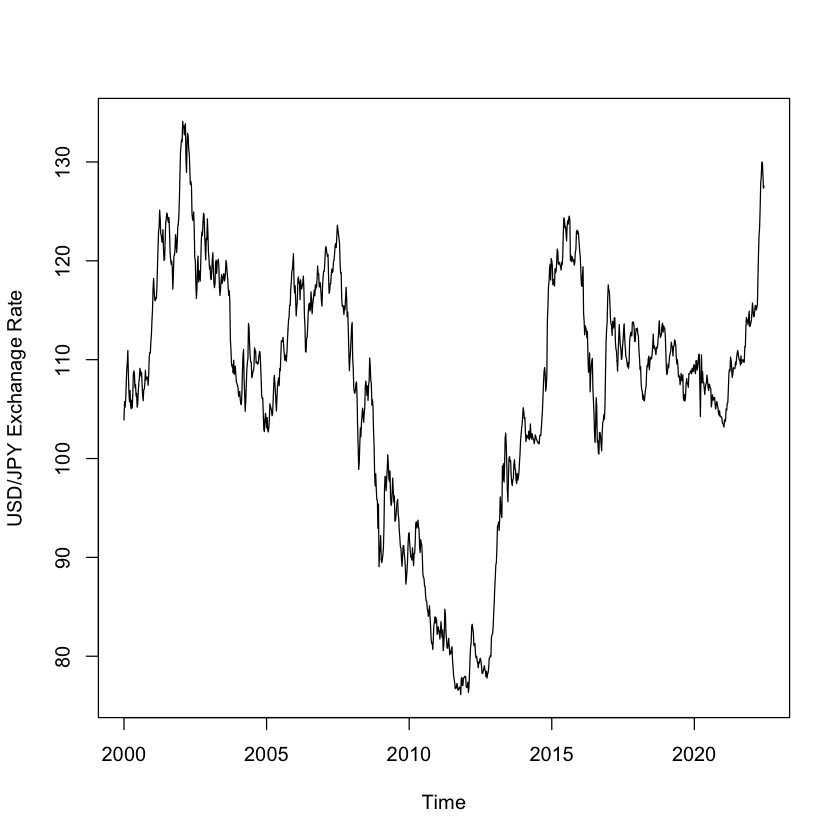

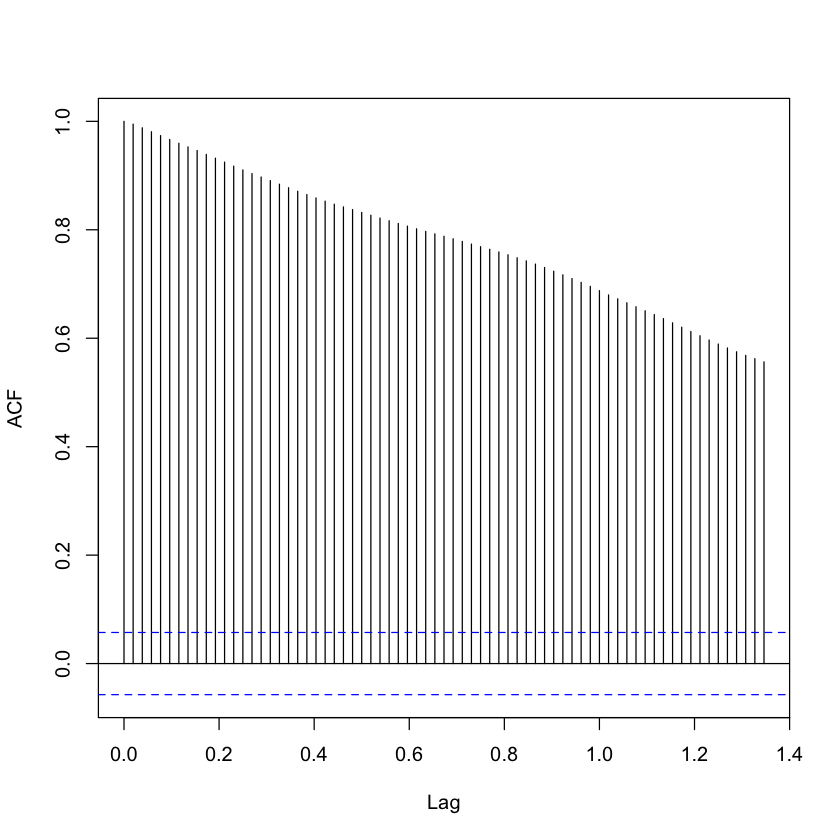

In [29]:
ts.plot(jpy.ts, ylab="USD/JPY Exchanage Rate")
acf(jpy.ts, lag.max=10*log(length(jpy.ts)), main="")

Times Series Plot
* The mean appears to remain constant (there is no trend)
* There does seem to be some seasonility; however this may be cyclical and unpredictable

ACF Plot
* There does not seem to be an oscillation betwen the time lags which would indicate the times series is not seasonal

Stationarity
* The time independent auto covariance assumption is violated as indicated by the ACF plot having spikes (i.e., at all lags) that exceed the limit.

# Question 1b: Trend Estimation

Fit the following trend estimation models:

- Moving Average

- Parametric Quadratic Polynomial

- Local Polynomial

- Splines Smoothing

Overlay the fitted values on the original time series. Plot the residuals with respect to time for each model. Plot the ACF of the residuals for each model also. Comment on the four models fit and on the appropriateness of the stationarity assumption of the residuals.

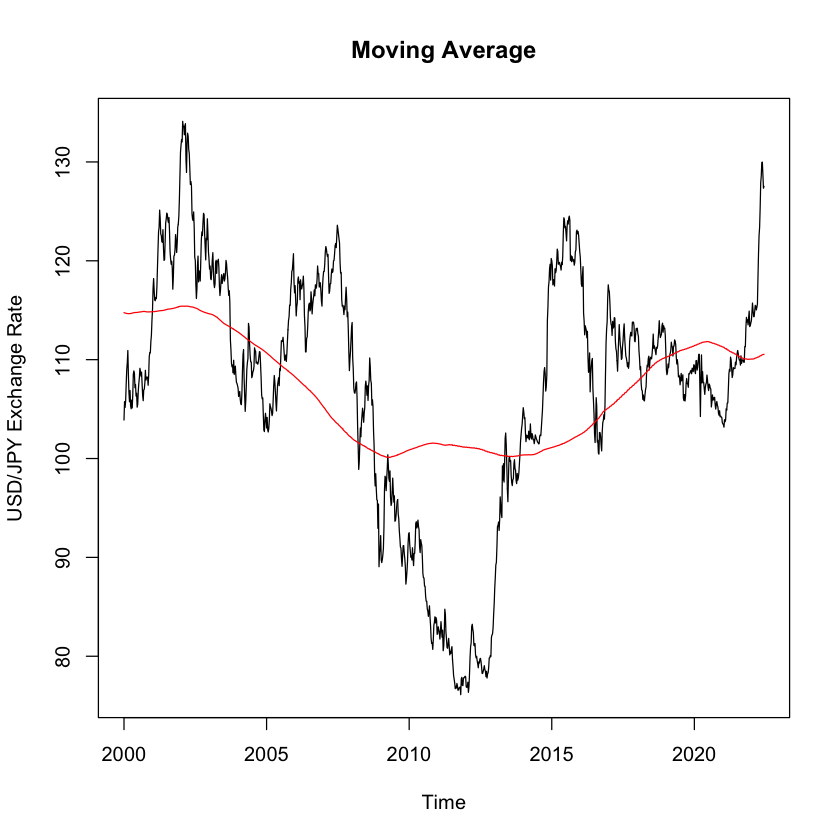

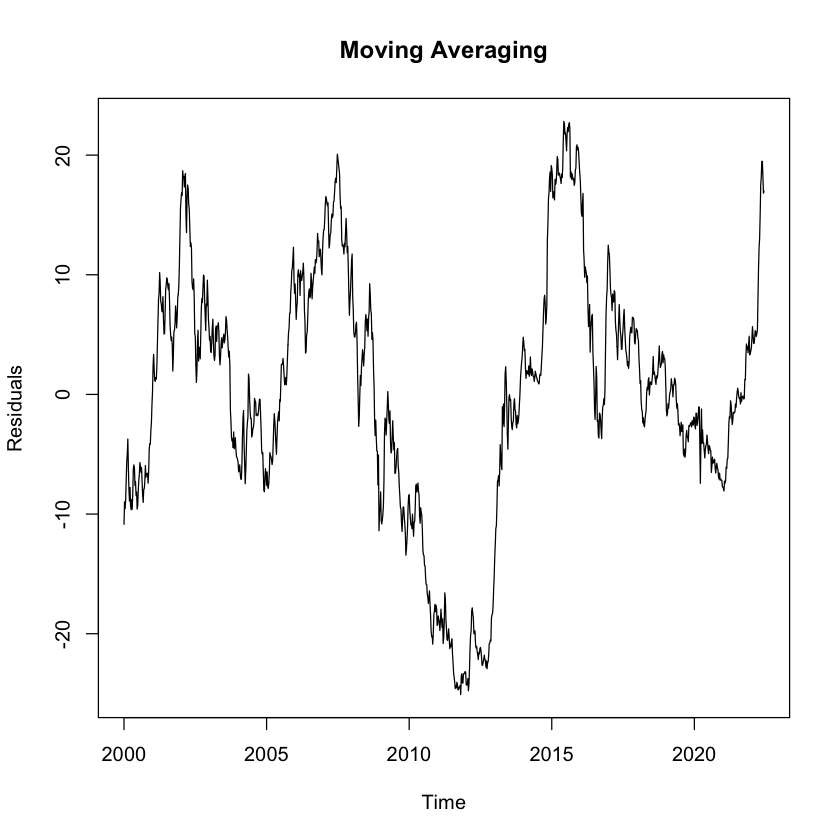

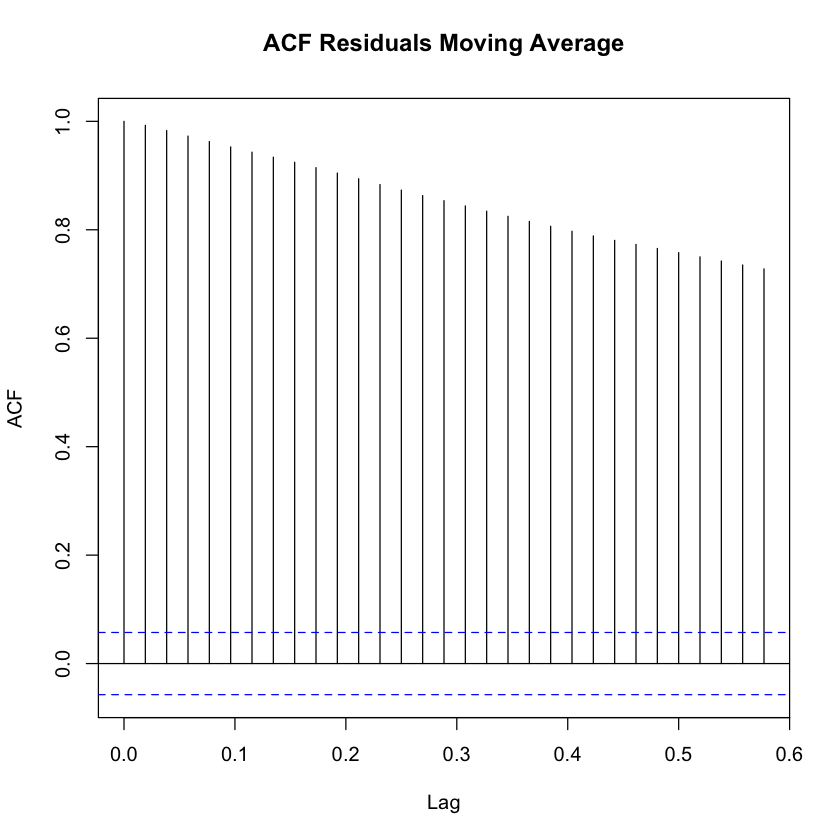

In [77]:
# Moving Average
time.pts = c(1:length(jpy.ts))
time.pts = (time.pts - min(time.pts)) / max(time.pts)
mav.fit = ksmooth(time.pts, jpy.ts, kernel = 'box')
jpy.fit.mav = ts(mav.fit$y, start = 2000, freq=52)
ts.plot(jpy.ts, ylab="USD/JPY Exchange Rate", main="Moving Average")
lines(jpy.fit.mav, col="red")

df.fit.mav = ts(jpy.ts-mav.fit$y, start=2000, freq=52)
ts.plot(df.fit.mav, ylab="Residuals", main="Moving Averaging")
acf(df.fit.mav, main="ACF Residuals Moving Average")

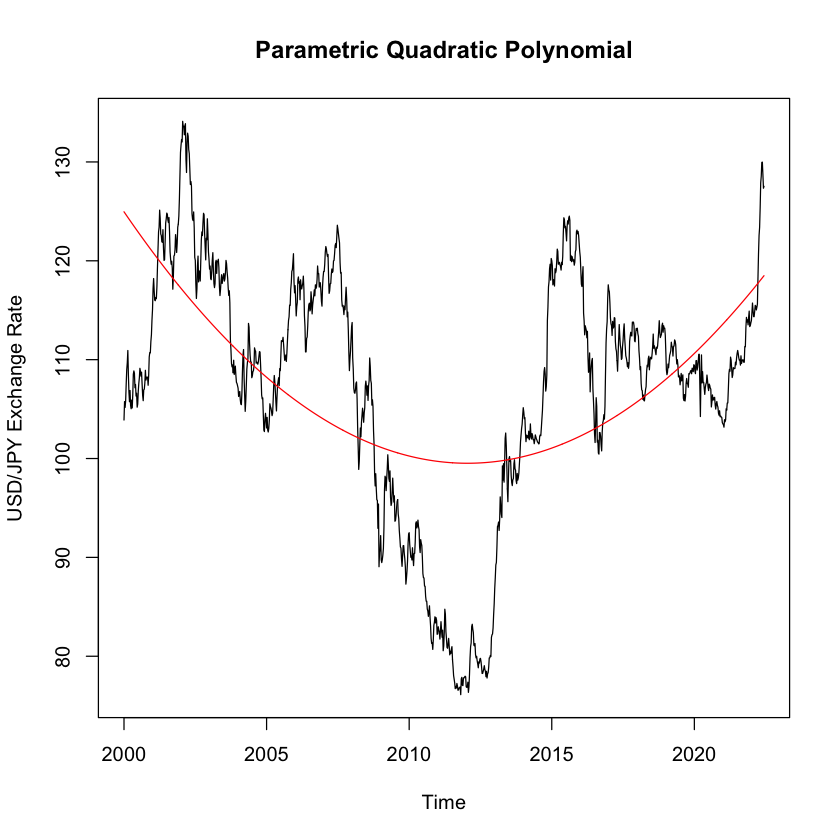

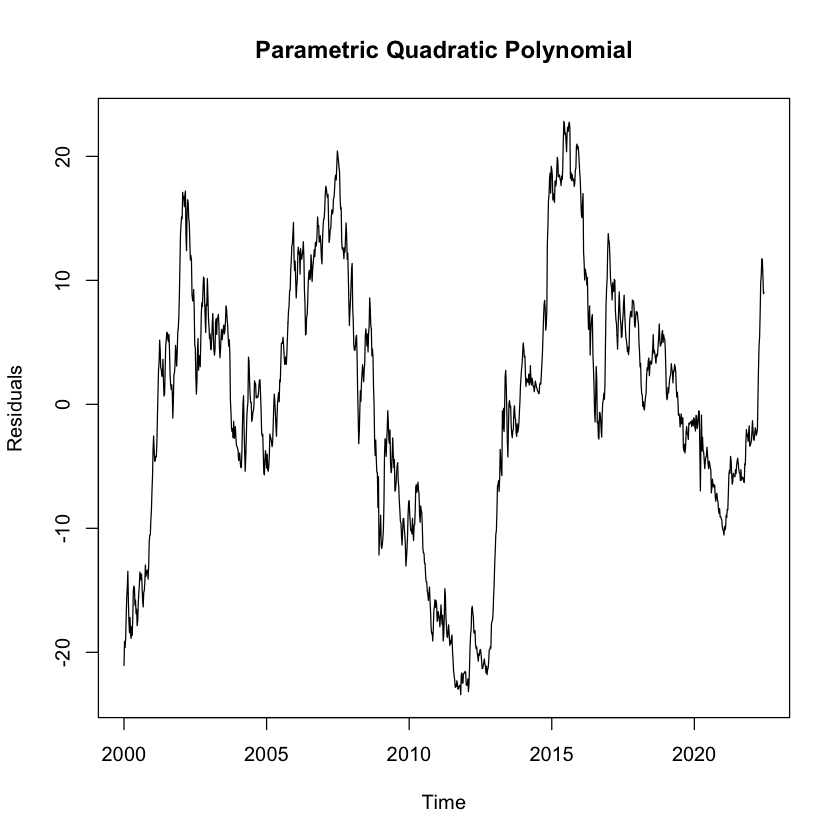

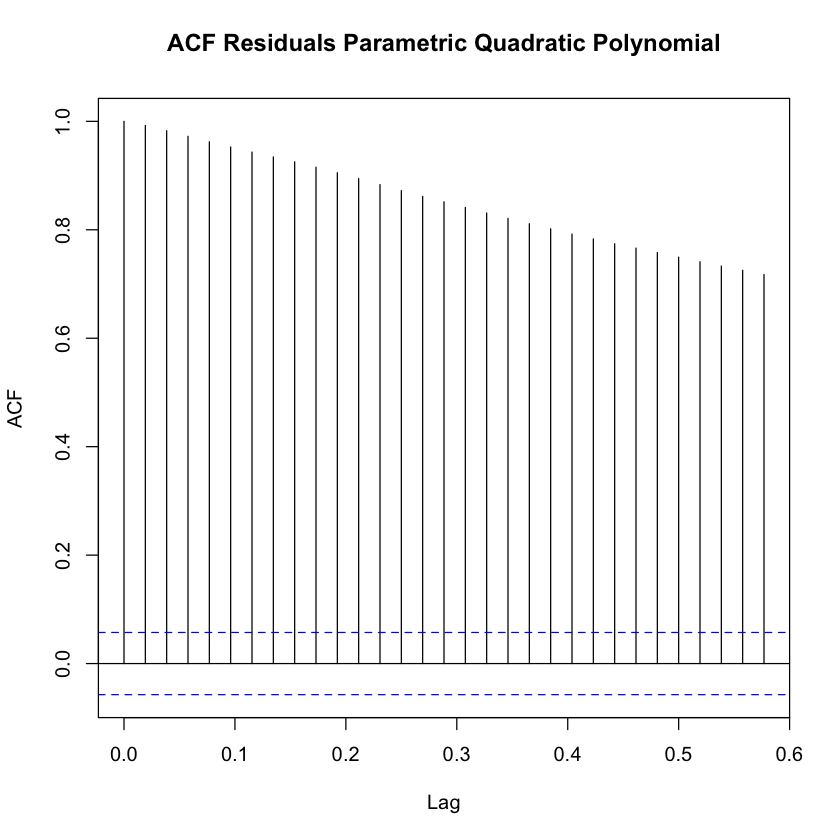

In [73]:
# Parametric Quadratic Polynomial
x1 = time.pts
x2 = time.pts^2
lm.fit = lm(jpy.ts~x1+x2)
jpy.fit.lm = ts(fitted(lm.fit), start=2000, freq=52)
ts.plot(jpy.ts, ylab="USD/JPY Exchange Rate", main="Parametric Quadratic Polynomial")
lines(jpy.fit.lm, col="red")

df.fit.lm = ts(jpy.ts-fitted(lm.fit), start=2000, freq=52)
ts.plot(df.fit.lm, ylab="Residuals", main="Parametric Quadratic Polynomial")
acf(df.fit.lm, main="ACF Residuals Parametric Quadratic Polynomial")

In [84]:
# Local Polynomial
loc.fit = loess(jpy.ts~time.pts)
jpy.fit.loc = ts(fitted(loc.fit), start=2000, freq=52)
ts.plot(jpy.ts, ylab="USD/JPY Exchange Rate", main="Local Polynomial")
lines(jpy.fit.loc, col="red")

df.fit.loc = ts(jpy.ts-fitted(loc.fit), start=2000, freq=52)
ts.plot(df.fit.loc, ylab="Residuals", main="Local Polynomial")
acf(df.fit.loc, main="ACF Residuals Local Polynomial")

ERROR: Error in model.frame.default(formula = jpy.ts ~ time.pts): variable lengths differ (found for 'time.pts')


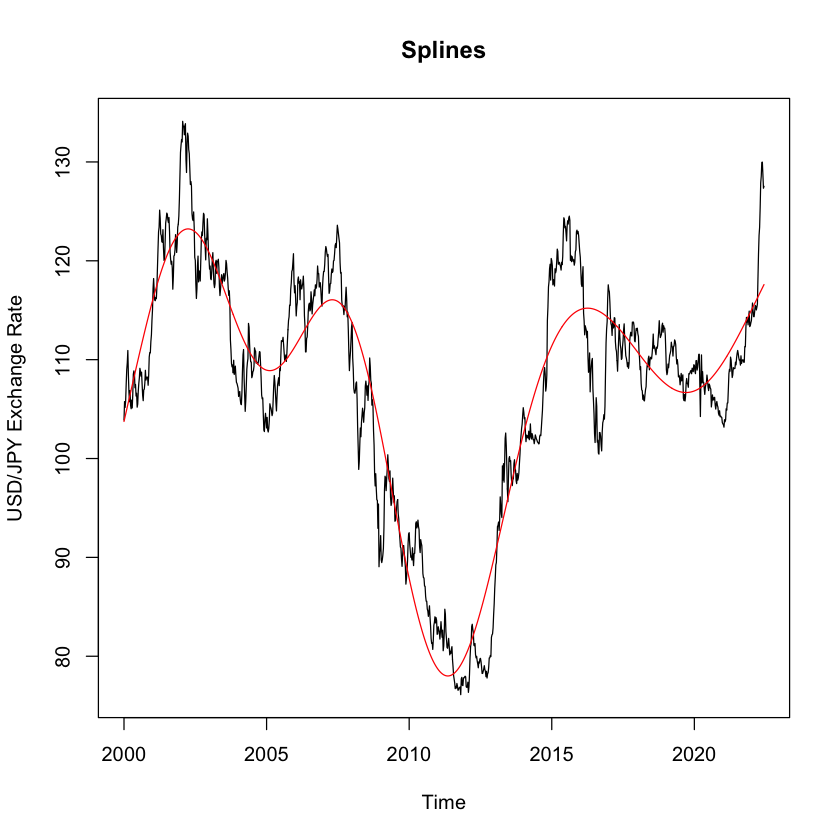

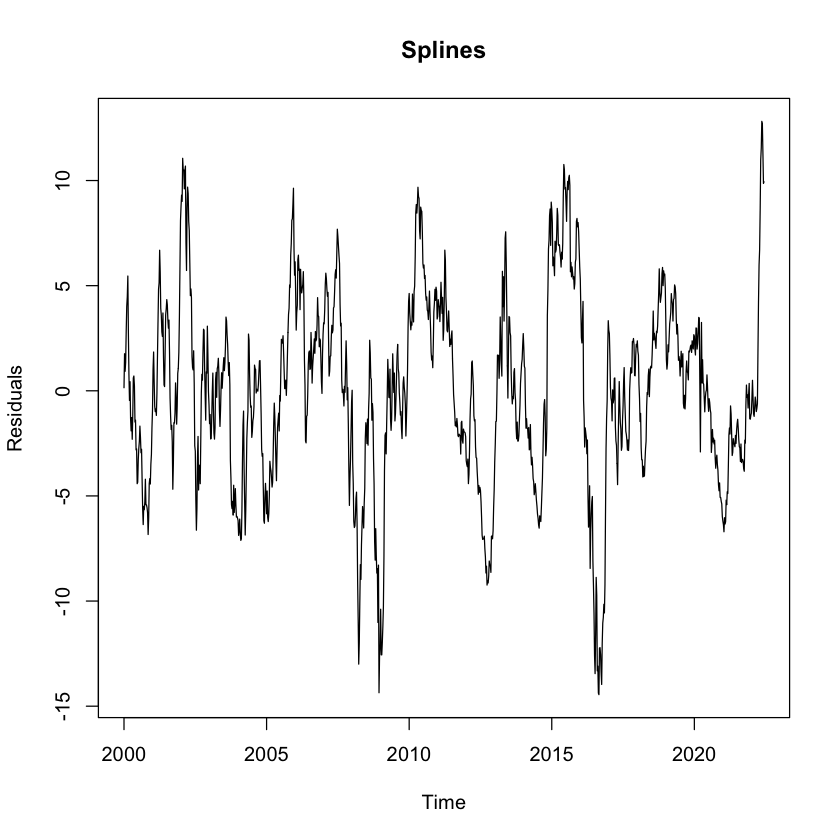

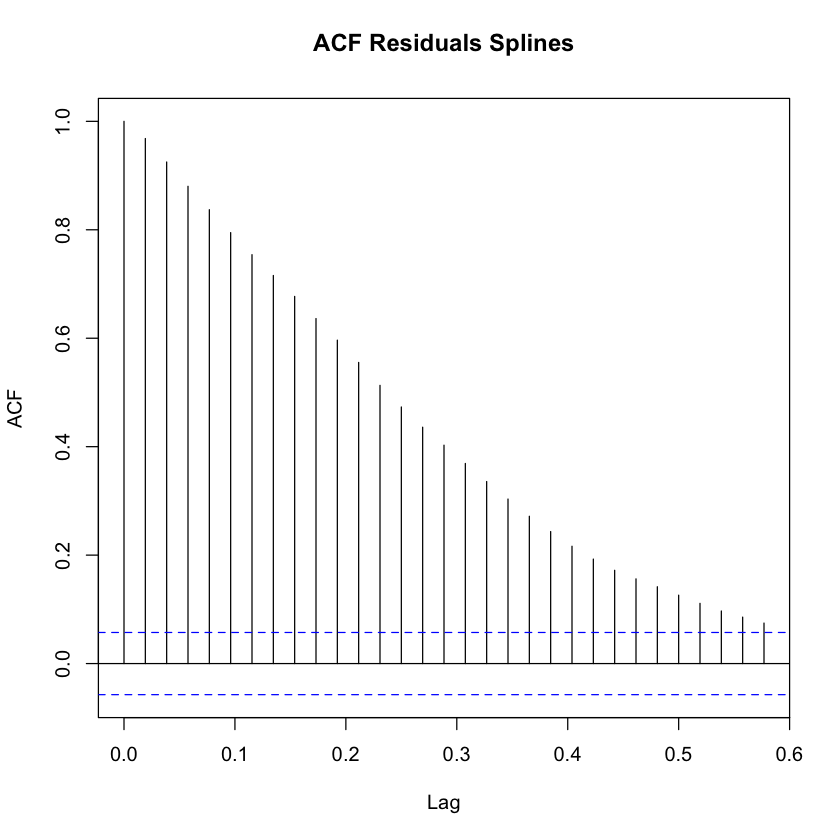

In [75]:
# Splines
gam.fit = gam(jpy.ts~s(time.pts))
jpy.fit.gam = ts(fitted(gam.fit), start=2000, freq=52)
ts.plot(jpy.ts, ylab="USD/JPY Exchange Rate", main="Splines")
lines(jpy.fit.gam, col="red")

df.fit.gam = ts(jpy.ts-fitted(gam.fit), start=2000, freq=52)
ts.plot(df.fit.gam, ylab="Residuals", main="Splines")
acf(df.fit.gam, main="ACF Residuals Splines")

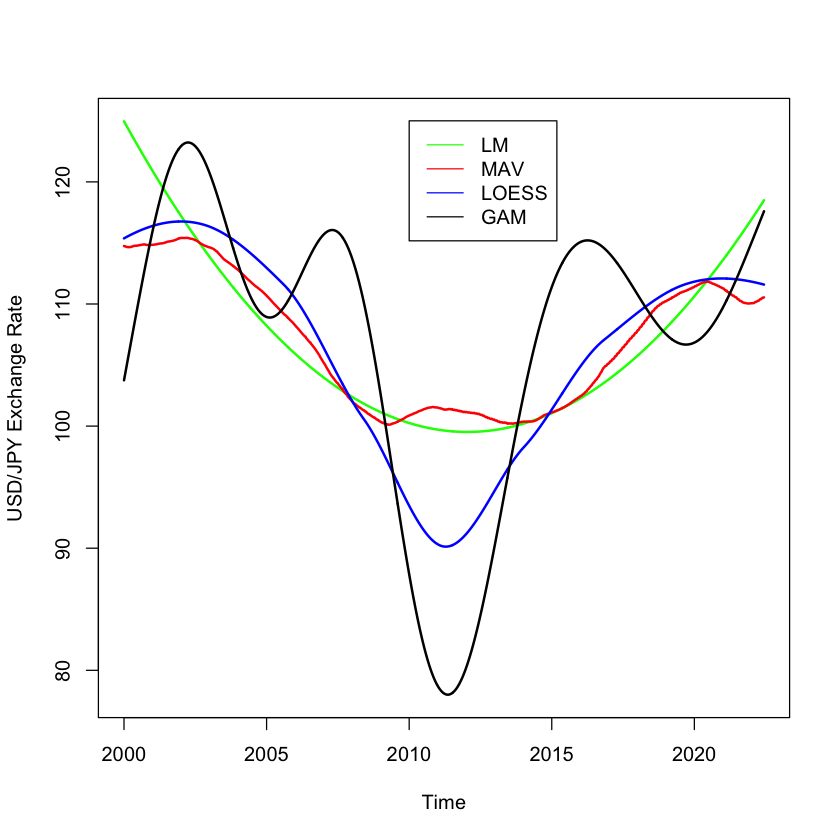

In [55]:
# Plot all on same graph
all.val = c(jpy.fit.mav, jpy.fit.lm, jpy.fit.loc, jpy.fit.gam)
ylim = c(min(all.val), max(all.val))
ts.plot(jpy.fit.lm, lwd=2, col="green", ylim=ylim, ylab="USD/JPY Exchange Rate")
lines(jpy.fit.mav, lwd=2, col="red")
lines(jpy.fit.loc, lwd=2, col="blue")
lines(jpy.fit.gam, lwd=2, col="black")
legend(x=2010, y=125, legend=c("LM", "MAV", "LOESS", "GAM"),lty=1, col=c("green", "red", "blue", "black"))

*Response: Comparison of the fitted trend models:*



Visually, the splines regression follows the closest. All peaks and troughs in the data are captured. Further, the residuals are mainly concentrated around 0 indicating closer to stationarity. However, the dataset is still not stationarity as evidenced by the acf plot.

Contrary to this, the parametric quadratic polynomial only has one local and global minimimum and does not seem to capture the deviations in the dataset closely enough. There is clear sea

The moving average and loess approaches show significant deviations in residuals

*Response: Appropriateness of the trend model for stationarity*

All ACF plots of the residuals deviate from stationarity as evidenced by the large spikes in each away from 0 for each lags.

# Question 1c: Differenced Data Modeling

Now plot the difference time series and its ACF plot. Apply the four trend models in Question 1b to the differenced time series. What can you conclude about the difference data in terms of stationarity? Which model would you recommend to apply (trend removal via fitting trend vs differencing) such that to obtain a stationary process?

**Hint:** When TS data are differenced, the resulting data set will have an NA in the first data element due to the differencing.

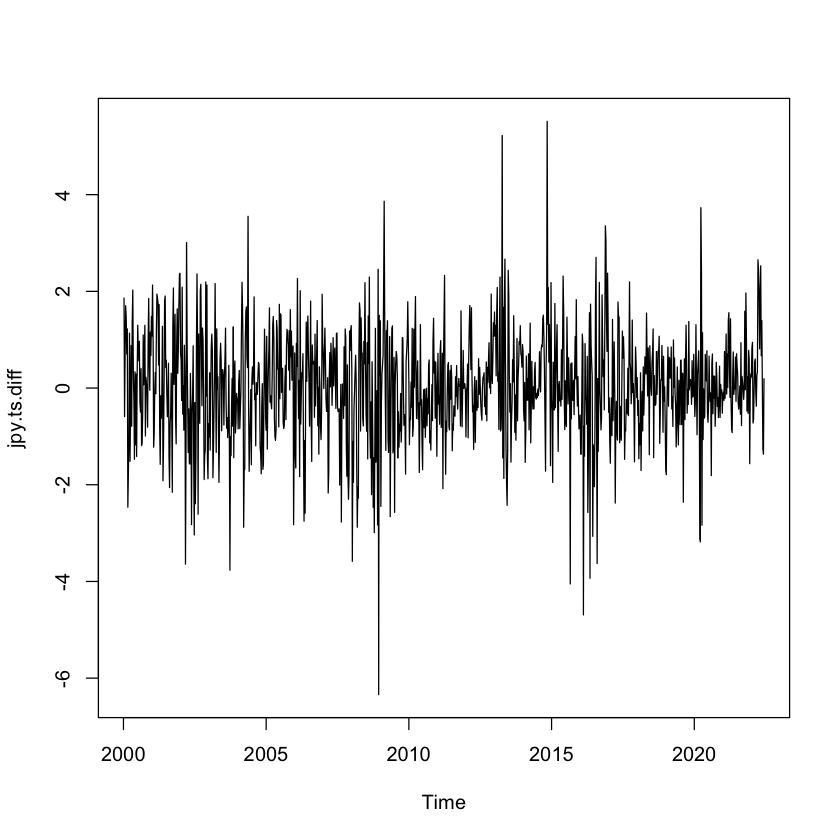

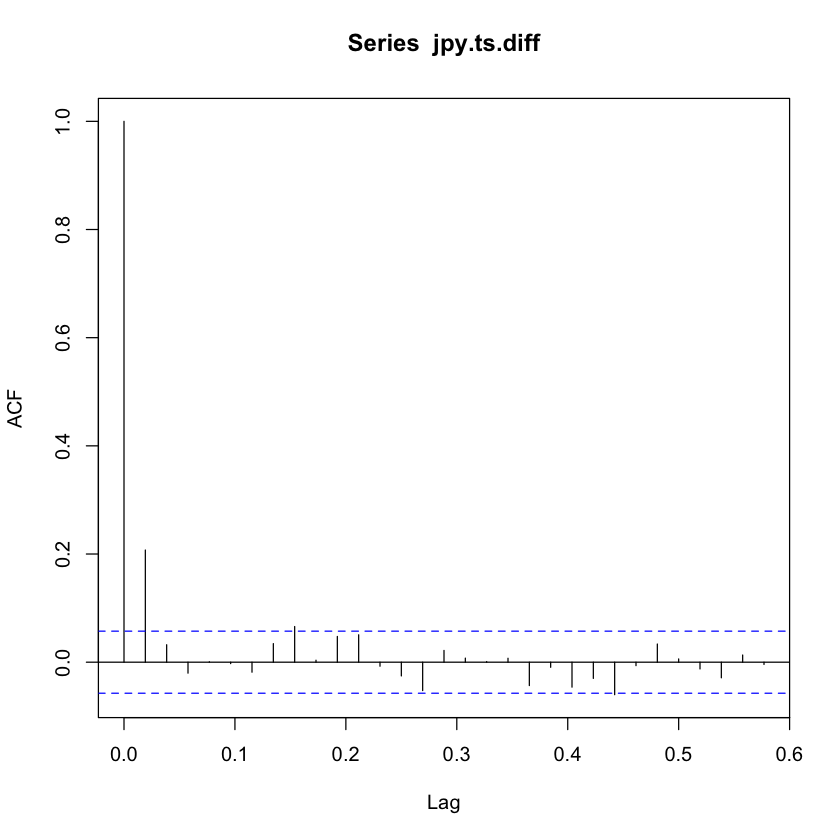

In [79]:
# Difference the time series
jpy.ts.diff = diff(jpy.ts)
plot.ts(jpy.ts.diff)
acf(jpy.ts.diff)

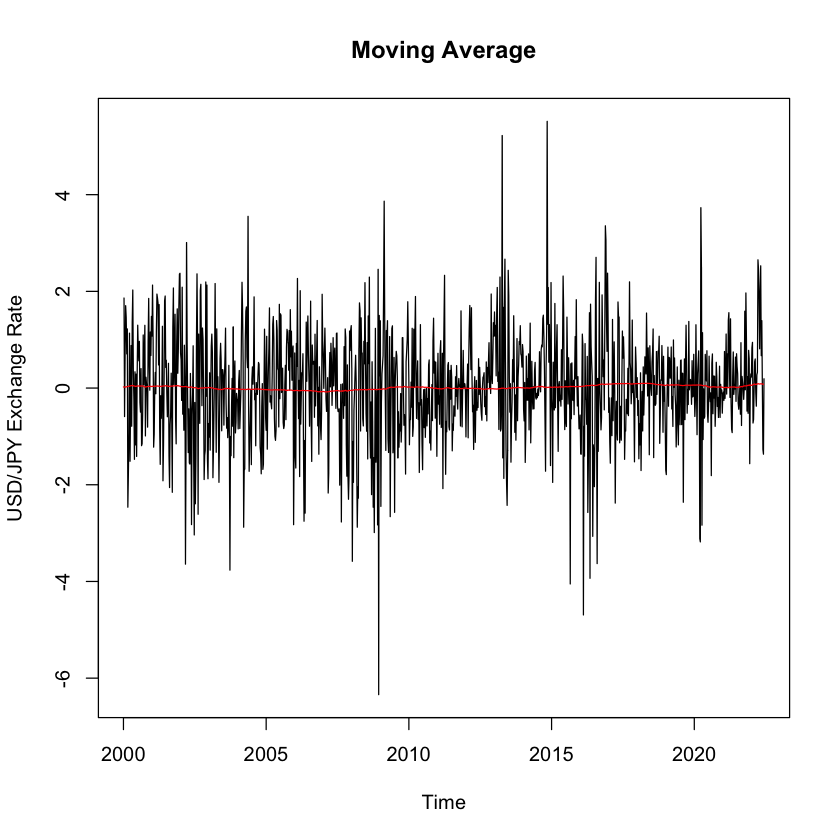

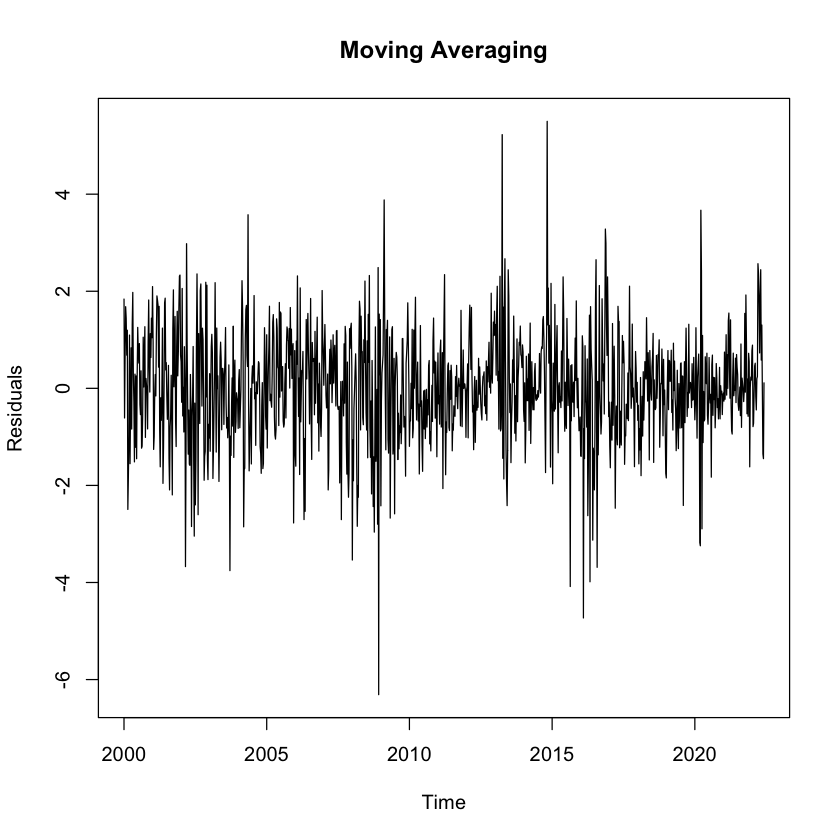

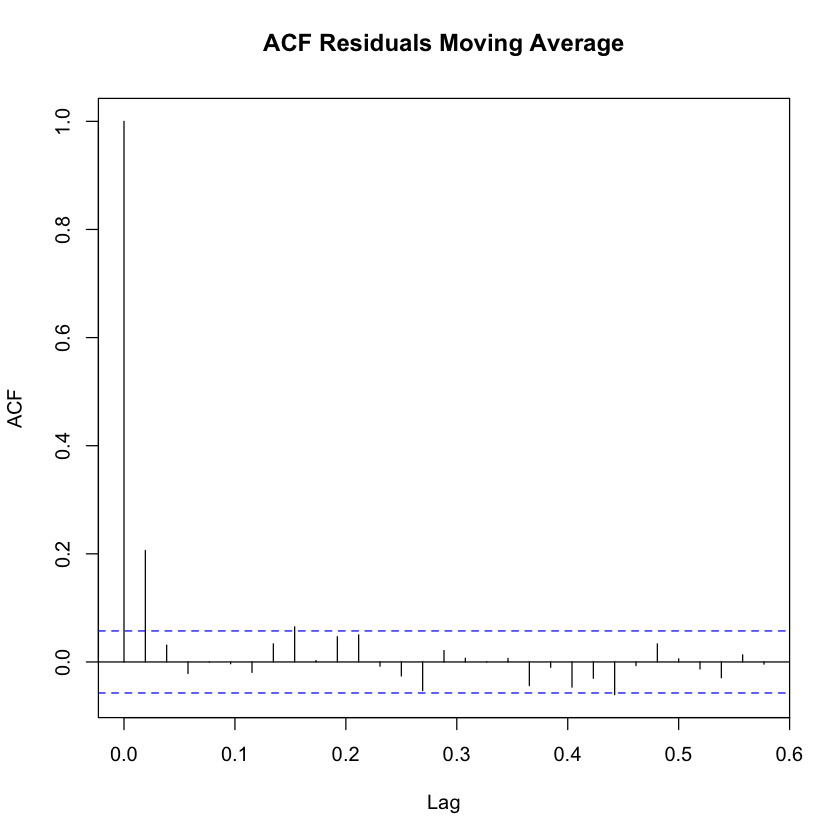

In [81]:
# Moving Average
time.pts = c(1:length(jpy.ts.diff))
time.pts = (time.pts - min(time.pts)) / max(time.pts)
mav.fit.diff = ksmooth(time.pts, jpy.ts.diff, kernel = 'box')
jpy.fit.mav.diff = ts(mav.fit.diff$y, start = 2000, freq=52)
ts.plot(jpy.ts.diff, ylab="USD/JPY Exchange Rate", main="Moving Average")
lines(jpy.fit.mav.diff, col="red")

df.fit.mav.diff = ts(jpy.ts.diff-mav.fit.diff$y, start=2000, freq=52)
ts.plot(df.fit.mav.diff, ylab="Residuals", main="Moving Averaging")
acf(df.fit.mav.diff, main="ACF Residuals Moving Average")

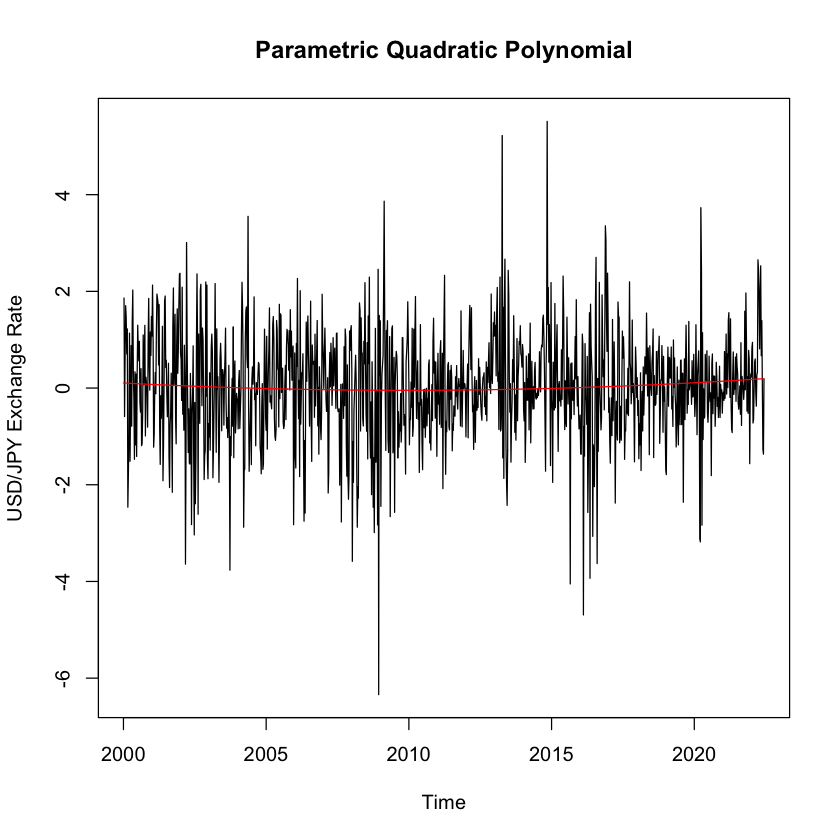

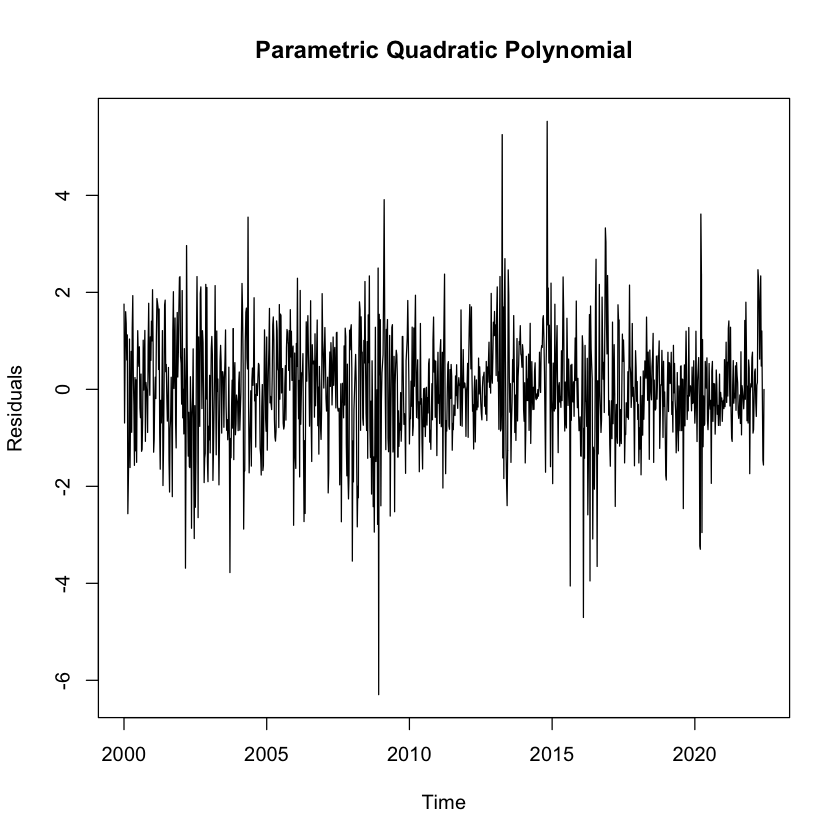

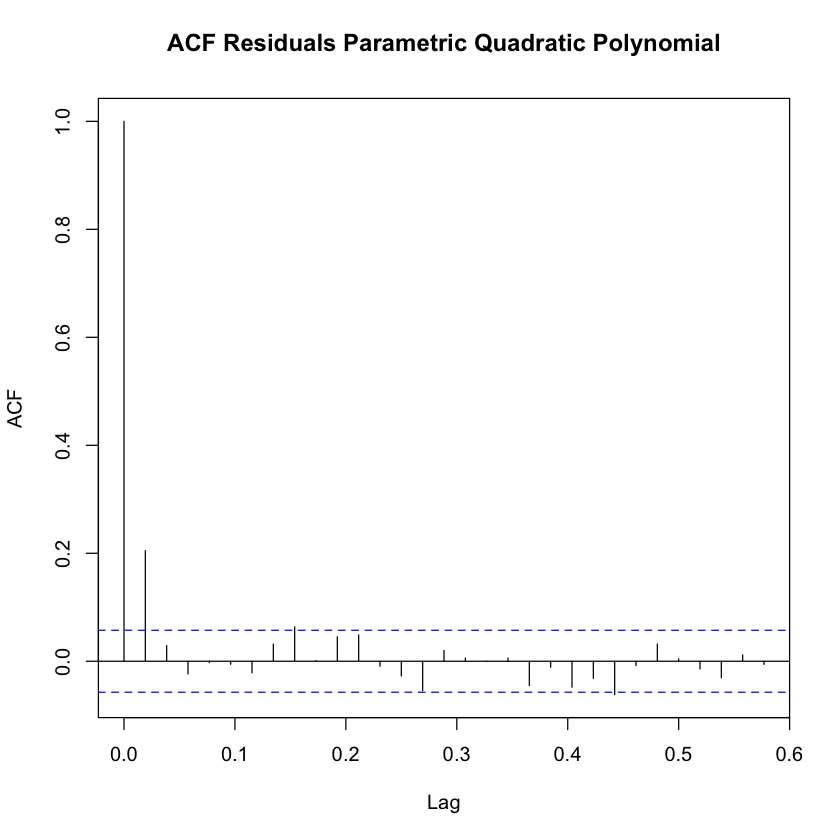

In [82]:
# Parametric Quadratic Polynomial
x1 = time.pts
x2 = time.pts^2
lm.fit.diff = lm(jpy.ts.diff~x1+x2)
jpy.fit.lm.diff = ts(fitted(lm.fit.diff), start=2000, freq=52)
ts.plot(jpy.ts.diff, ylab="USD/JPY Exchange Rate", main="Parametric Quadratic Polynomial")
lines(jpy.fit.lm.diff, col="red")

df.fit.lm.diff = ts(jpy.ts.diff-fitted(lm.fit.diff), start=2000, freq=52)
ts.plot(df.fit.lm.diff, ylab="Residuals", main="Parametric Quadratic Polynomial")
acf(df.fit.lm.diff, main="ACF Residuals Parametric Quadratic Polynomial")

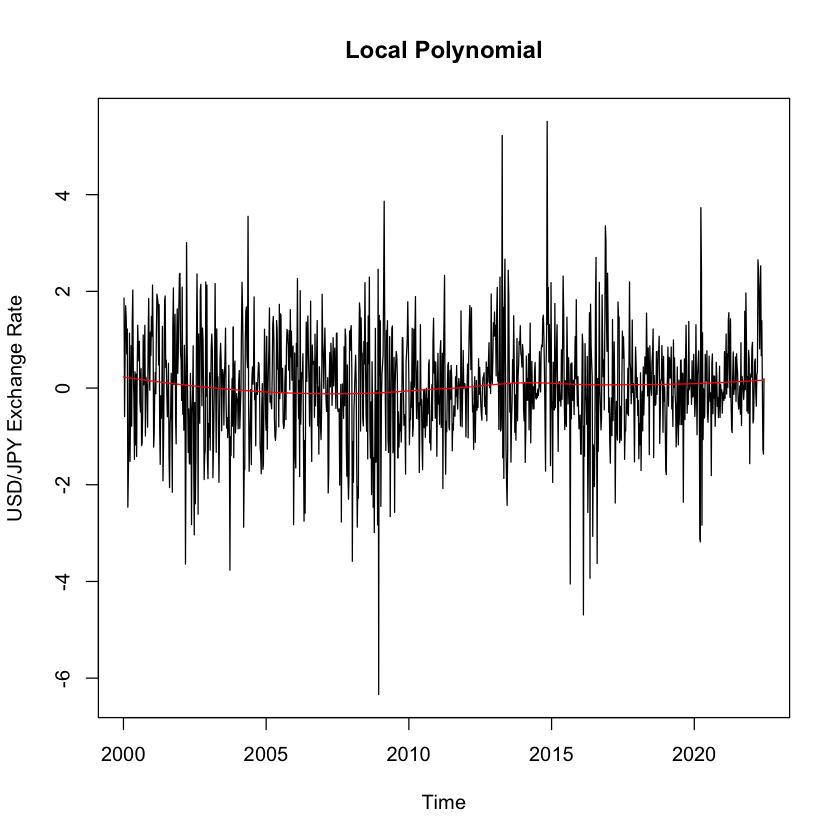

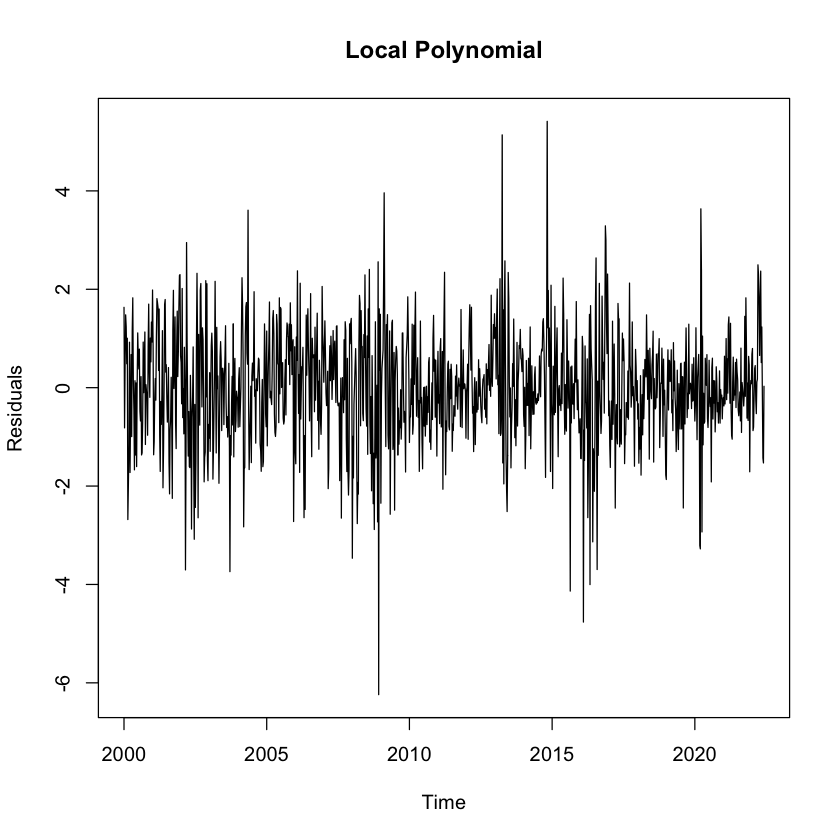

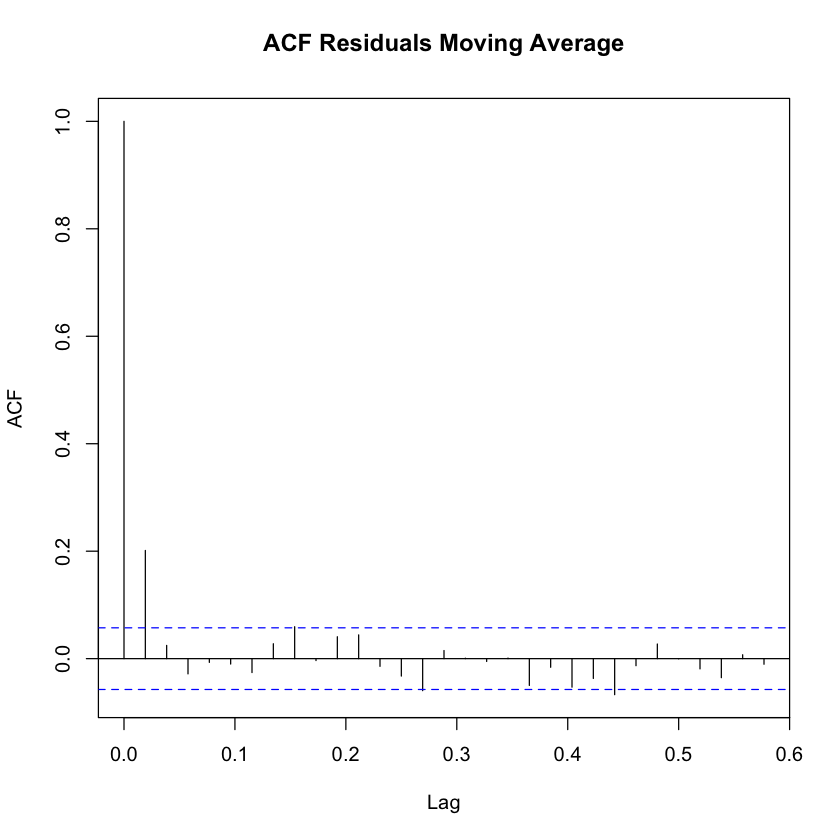

In [83]:
# Local Polynomial
loc.fit.diff = loess(jpy.ts.diff~time.pts)
jpy.fit.loc.diff = ts(fitted(loc.fit.diff), start=2000, freq=52)
ts.plot(jpy.ts.diff, ylab="USD/JPY Exchange Rate", main="Local Polynomial")
lines(jpy.fit.loc.diff, col="red")

df.fit.loc.diff = ts(jpy.ts.diff-fitted(loc.fit.diff), start=2000, freq=52)
ts.plot(df.fit.loc.diff, ylab="Residuals", main="Local Polynomial")
acf(df.fit.loc.diff, main="ACF Residuals Local Polynomial")

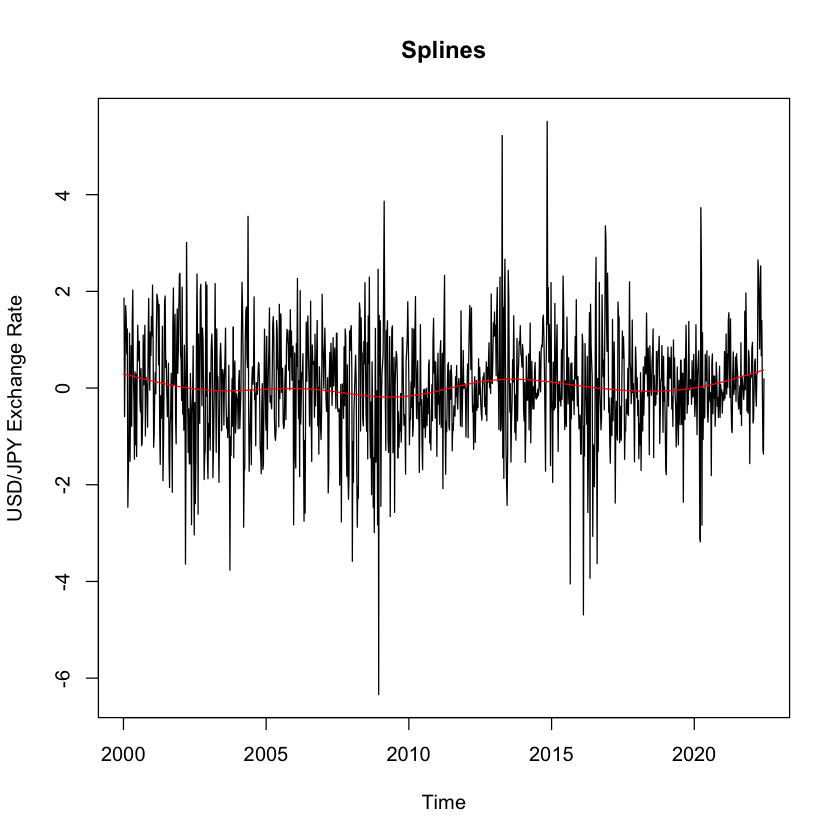

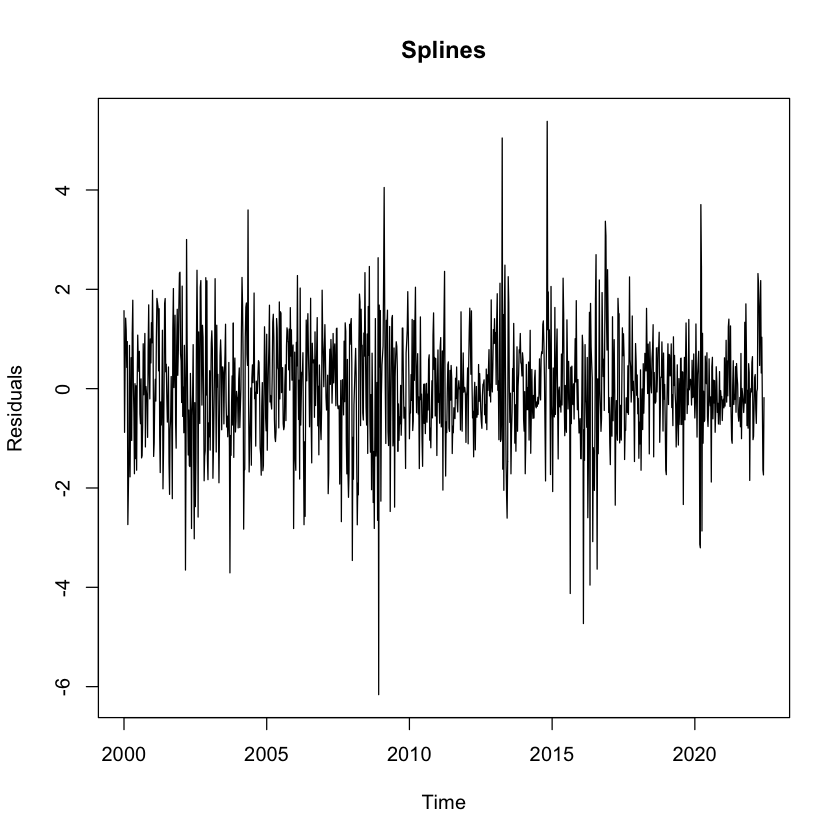

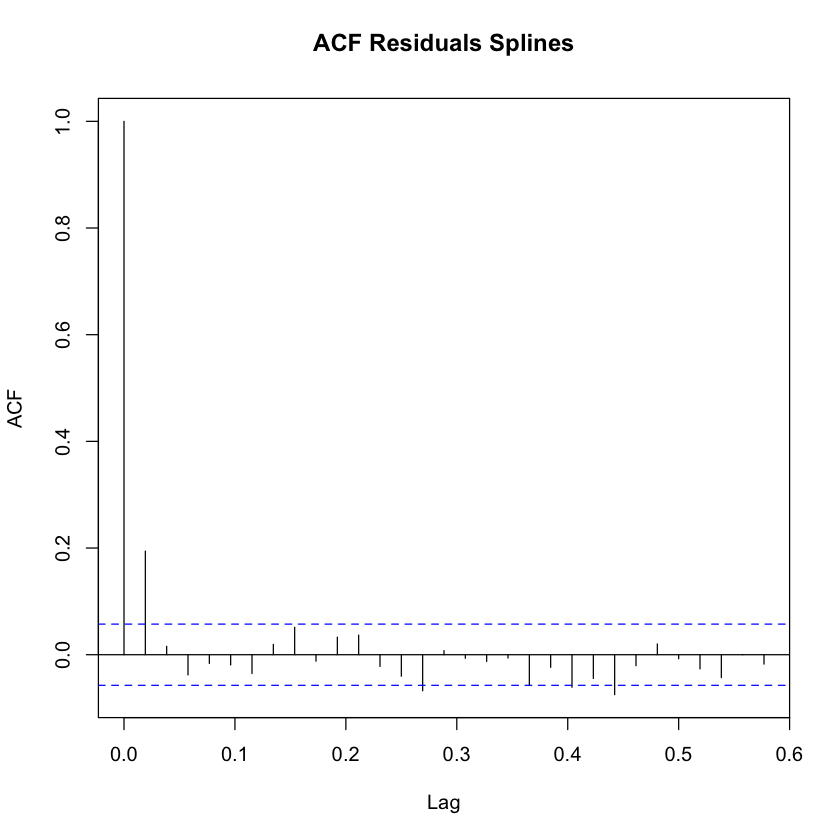

In [85]:
# Splines
gam.fit.diff = gam(jpy.ts.diff~s(time.pts))
jpy.fit.gam.diff = ts(fitted(gam.fit.diff), start=2000, freq=52)
ts.plot(jpy.ts.diff, ylab="USD/JPY Exchange Rate", main="Splines")
lines(jpy.fit.gam.diff, col="red")

df.fit.gam.diff = ts(jpy.ts.diff-fitted(gam.fit.diff), start=2000, freq=52)
ts.plot(df.fit.gam.diff, ylab="Residuals", main="Splines")
acf(df.fit.gam.diff, main="ACF Residuals Splines")

*Response: Comments about the stationarity of the difference data:*

After differencing the data the data appears to be somewhat stationary. All four models exhibit some seasonality; however, each are much closer to being stationary.

If the end goal is to achieve a stationary process, I would choose to difference the data rather than detrend. This selection is evidenced by the acf plots of the differenced data models that show the autocorrelation close to zero.

# Part 2: Temperature Analysis

# Background

In this problem, we will analyze aggregated temperature data.

Data *Everest Temp Jan-Mar 2021.csv* contains the hourly average temperature at the Mount Everest Base Camp for the months of January to March 2021. Run the following code to prepare the data for analysis:

## Instructions on reading the data

To read the data in `R`, save the file in your working directory (make sure you have changed the directory if different from the R working directory) and read the data using the `R` function `read.csv()`

You will perform the analysis and modelling on the `Temp` data column.

In [87]:
fpath <- "Everest Temp Jan-Mar 2021.csv"
df <- read.csv(fpath, head = TRUE)


Here are the libraries you will need:



In [ ]:
library(mgcv)
library(TSA)
library(dynlm)


Run the following code to prepare the data for analysis:



In [ ]:
df$timestamp<-ymd_hms(df$timestamp)
temp <- ts(df$temp, freq = 24)

datetime<-ts(df$timestamp)


  

# Question 2a: Exploratory Data Analysis

Plot both the Time Series and ACF plots. Comment on the main features, and identify what (if any) assumptions of stationarity are violated. Additionally, comment if you believe the differenced data is more appropriate for use in fitting the data. Support your response with a graphical analysis.

**Hint:** Make sure to use the appropriate differenced data. 


*Response: Comments about the time series and ACF plots of the original time series*



*Response: Comments about the time series and ACF plots of the difference time series*

# Question 2b: Seasonality Estimation

Separately fit a seasonality harmonic model and the ANOVA seasonality model to the temperature data. Evaluate the quality of each fit with residual analysis. Does one model perform better than the other? Which model would you select to fit the seasonality in the data?

*Response: Compare Seasonality Models*

# Question 2c: Trend-Seasonality Estimation

Using the time series data, fit the following models to estimate the trend with seasonality fitted using ANOVA:

- Parametric Polynomial Regression

- Non-parametric model

Overlay the fitted values on the original time series. Plot the residuals with respect to time. Plot the ACF of the residuals. Comment on how the two models fit and on the appropriateness of the stationarity assumption of the residuals.

What form of modelling seems most appropriate and what implications might this have for how one might expect long term temperature data to behave? Provide explicit conclusions based on the data analysis.

*Response: Model Comparison*

